In [19]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load the job description and ksat datasets
job_df = pd.read_excel("C:/Users/mrina/Downloads/careeronestop_data.xlsx")
nice_df = pd.read_csv('/Users/mrina/Desktop/nice.csv',encoding='latin-1')

# Clean and preprocess the text data in both datasets
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join the tokens back into a string
    clean_text = ' '.join(tokens)
    return clean_text

job_df['clean_description'] = job_df['description'].apply(preprocess_text)

# Create a new column in job_df to store the percentage of mapped keywords
job_df['ksat_percentage'] = 0.0
job_df['category'] = ''
job_df['code'] = ''

# Loop through each row in nice_df and map the keywords to job_df
for i, row in nice_df.iterrows():
    # Preprocess the ksat text in this row
    clean_ksat = preprocess_text(row['ksat'])
    # Loop through each row in job_df and calculate the percentage of mapped keywords
    for j, j_row in job_df.iterrows():
        # Preprocess the job description text in this row
        clean_description = j_row['clean_description']
        # Count the number of overlapping words between the ksat and description
        overlap = set(clean_ksat.split()).intersection(clean_description.split())
        # Calculate the percentage of mapped keywords
        ksat_percentage = len(overlap) / len(set(clean_ksat.split())) * 100
        # Update the ksat_percentage column in job_df if this percentage is higher than the current value
        if ksat_percentage > j_row['ksat_percentage']:
            job_df.at[j, 'ksat_percentage'] = ksat_percentage
            job_df.at[j, 'category'] = row['category']
            job_df.at[j, 'code'] = row['code']

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

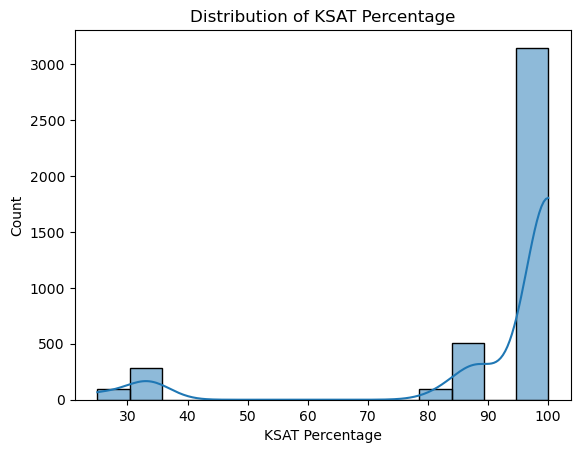

In [33]:
# Explore the 'ksat_percentage' column
sns.histplot(data=job_df, x='ksat_percentage', kde=True)
plt.title('Distribution of KSAT Percentage')
plt.xlabel('KSAT Percentage')
plt.ylabel('Count')
plt.show()

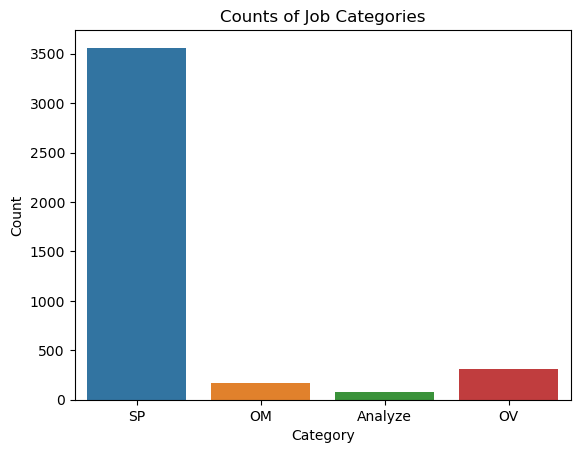

In [34]:
# Explore the 'category' column
sns.countplot(data=job_df, x='category')
plt.title('Counts of Job Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

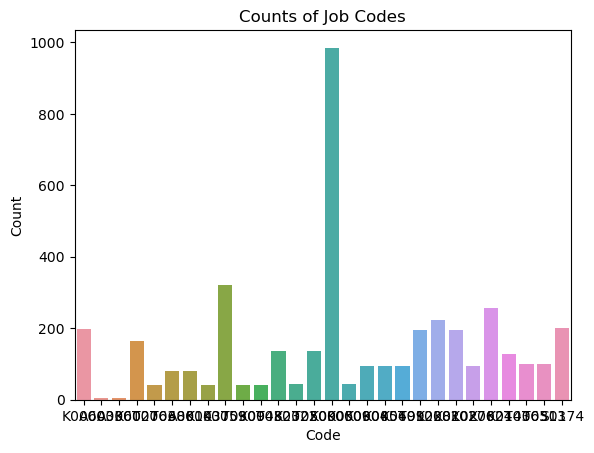

In [35]:
# Explore the 'code' column
sns.countplot(data=job_df, x='code')
plt.title('Counts of Job Codes')
plt.xlabel('Code')
plt.ylabel('Count')
plt.show()

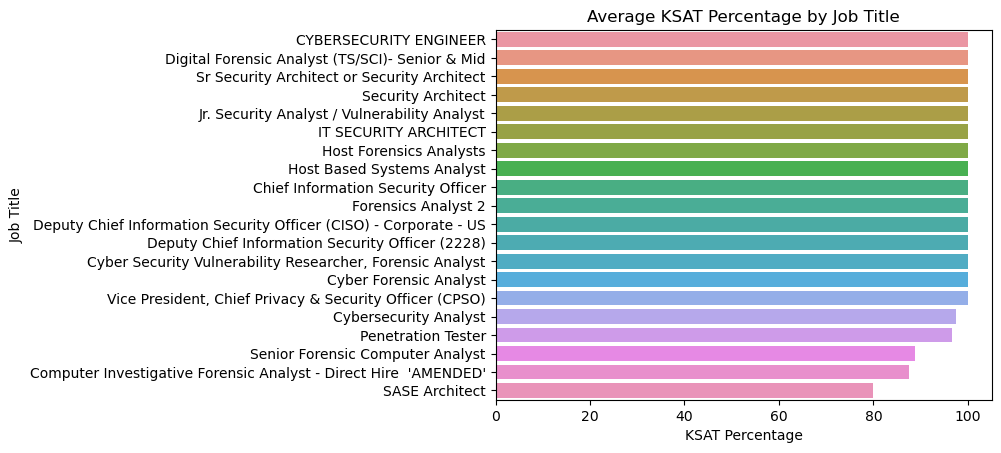

In [38]:
# Explore the relationship between 'ksat_percentage' and 'job_title'
job_titles = job_df.groupby('job_title')['ksat_percentage'].mean().sort_values(ascending=False)[:20]
sns.barplot(x=job_titles, y=job_titles.index)
plt.title('Average KSAT Percentage by Job Title')
plt.xlabel('KSAT Percentage')
plt.ylabel('Job Title')
plt.show()